### **텐서플로우 2.0**

In [1]:
# Tensorflow 버전 변경
try : 
  %tensorflow_version 2.x
except Exception : 
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [2]:
# 버전 확인
import tensorflow as tf
print(tf.__version__)

2.1.0


### **난수생성**


In [3]:
# 균등분포 난수 생성
rand = tf.random.uniform([1], 0, 1)
print(rand)

tf.Tensor([0.8223326], shape=(1,), dtype=float32)


In [4]:
# 균등분포 난수 생성
rand = tf.random.uniform([4], 0, 1)
print(rand)

tf.Tensor([0.5252849  0.8200865  0.1405468  0.15594947], shape=(4,), dtype=float32)


In [5]:
# 정규분포 난수 생성
rand = tf.random.normal([4], 0, 1)
print(rand)

tf.Tensor([-0.7591608  0.8715176 -2.1236455  1.5816457], shape=(4,), dtype=float32)


### **시그모이드 **

In [0]:
# 시그모이드 함수를 정의
import math
def sigmoid(x) : 
  return 1 / (1 + math.exp(-x))

In [7]:
# x=1과 랜덤으로 생성한 값인 w를 곱한 값을 시그모이드 함수에 집어 넣어 y=0과 에러를 비교
x = 1
y = 0
w = tf.random.normal([1], 0, 1)
output = sigmoid(x * w)
print(output)

0.8036099065095362


### **뉴런의 구조**

In [8]:
# 입력이 1, 출력이 0이되는 뉴런

for i in range(1000) : 

  # 시그모이드를 이용하여 값 계산 
  output = sigmoid(x * w)
  # 실제값과의 오차 계산
  error = y - output
  # 실제값의 차이를 줄이는 방향으로 가중치(w) 조정
  w = w + x * 0.1 * error
  # 100번째마다 실행 결과 출력
  if i % 100 == 99 : 
    print(i, error, output)

99 -0.12663000935665802 0.12663000935665802
199 -0.05851824052022776 0.05851824052022776
299 -0.03753091894924337 0.03753091894924337
399 -0.02751820967768898 0.02751820967768898
499 -0.021688483344325372 0.021688483344325372
599 -0.01788261569682414 0.01788261569682414
699 -0.01520601967986536 0.01520601967986536
799 -0.013222473338212304 0.013222473338212304
899 -0.011694414775138683 0.011694414775138683
999 -0.010481566310650559 0.010481566310650559


In [9]:
# 입력이 0, 출력이 1 이되는 뉴런
x = 0
y = 1
w = tf.random.normal([1], 0, 1)

for i in range(1000) : 

  # 시그모이드를 이용하여 값 계산 
  output = sigmoid(x * w)
  # 실제값과의 오차 계산
  error = y - output
  # 실제값의 차이를 줄이는 방향으로 가중치(w) 조정
  w = w + x * 0.1 * error
  # 100번째마다 실행 결과 출력
  if i % 100 == 99 : 
    print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


In [10]:
# x=0일 때  y=1을 얻는 뉴런의 학습에 편향을 더함
x = 0
y = 1
w = tf.random.normal([1], 0, 1)
b = tf.random.normal([1], 0, 1)

for i in range(1000) : 

  output = sigmoid(x * w + 1 + b)
  error = y - output

  w = w + x * 0.1 * error
  b = b + 1 * 0.1 * error

  if i % 100 == 99 : 
    print(i, error, output)

99 0.08245855904606458 0.9175414409539354
199 0.04641885128224277 0.9535811487177572
299 0.03207502666254558 0.9679249733374544
399 0.024443349954887172 0.9755566500451128
499 0.019722972129291638 0.9802770278707084
599 0.016520551584996768 0.9834794484150032
699 0.014207558611871951 0.985792441388128
799 0.012459735359467206 0.9875402646405328
899 0.011093017235606517 0.9889069827643935
999 0.009995340735975744 0.9900046592640243


### **첫번째 신경망 네트워크 : AND**

In [11]:
# True, False의 정숫값 확인
print(int(True))
print(int(False))

1
0


In [12]:
# Sigmoid Function
import math
def sigmoid(x) : 
  return 1 / (1 + math.exp(-x))

# AND 네트워크
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000) : 

  error_sum = 0

  for j in range(4) :

    output = sigmoid(np.sum(x[j]*w) + b_x*b)
    error = y[j][0] - output

    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    
    error_sum += error

  if i % 200 == 199 : 
      print(i, error_sum)

199 -0.1157031484293759
399 -0.06756317506380137
599 -0.04761943831450189
799 -0.0366571667582111
999 -0.029740820237154523
1199 -0.02499067672186479
1399 -0.02153157093568363
1599 -0.018904900044262676
1799 -0.016840988059323055
1999 -0.01517997345092698


In [13]:
# Python에서 list에 int를 곱하기
print([1,2,3]*2)
print([1,2,3]*0)
print([1,2,3]*-1)

[1, 2, 3, 1, 2, 3]
[]
[]


In [0]:
# list에 float는 곱할 수 없다.
# print([1,2,3]**0.01)

In [15]:
# array에 int와 float 곱하기
import numpy as np
print(np.array([1,2,3])*2)
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.01)

[2 4 6]
[0 0 0]
[-1 -2 -3]
[0.01 0.02 0.03]


In [16]:
# AND 네트워크의 평가
for i in range(4) : 
  print('X :', x[i], 'Y :', y[i], 'Output :', sigmoid(np.sum(x[i]*w)+b))

X : [1 1] Y : [1] Output : 0.9645606258082462
X : [1 0] Y : [0] Output : 0.0251118185641778
X : [0 1] Y : [0] Output : 0.025189330527080223
X : [0 0] Y : [0] Output : 2.4454883847409384e-05


### **두번째 신경망 네트워크 : OR**

In [17]:
# OR 네트워크
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[1],[1],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000) : 
  error_sum = 0
  for j in range(4) : 
    output = sigmoid(np.sum(x[j]*w) + b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 200 == 199 : 
    print(i, error_sum)

199 -0.04706863889468796
399 -0.025193239042138063
599 -0.017082309740539453
799 -0.012877869549554055
999 -0.010316034613042188
1199 -0.008595501955697318
1399 -0.007362471414398025
1599 -0.0064355312259713054
1799 -0.005714970681632604
1999 -0.00513705695895339


In [18]:
# OR 네트워크의 평가
for i in range(4) : 
  print('X :', x[i], 'Y :', y[i], 'Output :', sigmoid(np.sum(x[i]*w)+b))

X : [1 1] Y : [1] Output : 0.9999972261006707
X : [1 0] Y : [1] Output : 0.9898138940485998
X : [0 1] Y : [1] Output : 0.9897920056655308
X : [0 0] Y : [0] Output : 0.025470396800068015


In [19]:
print('w :', w)
print('b :', b)

w : tf.Tensor([8.22093  8.218761], shape=(2,), dtype=float32)
b : tf.Tensor([-3.644438], shape=(1,), dtype=float32)


### **세번째 신경망 네트워크 : XOR**

In [20]:
# OR 네트워크
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000) : 
  error_sum = 0
  for j in range(4) : 
    output = sigmoid(np.sum(x[j]*w) + b_x*b)
    error = y[j][0] - output
    w = w + x[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error
  if i % 200 == 199 : 
    print(i, error_sum)

# OR 네트워크의 평가
for i in range(4) : 
  print('X :', x[i], 'Y :', y[i], 'Output :', sigmoid(np.sum(x[i]*w)+b))

199 -0.009218540869625036
399 -0.0003749902841769792
599 -1.5252440755064711e-05
799 -6.291602535624108e-07
999 -9.307107307066076e-10
1199 3.722842145670313e-09
1399 3.722842145670313e-09
1599 3.722842145670313e-09
1799 3.722842145670313e-09
1999 3.722842145670313e-09
X : [1 1] Y : [0] Output : 0.5128176286712095
X : [1 0] Y : [1] Output : 0.5128176305326305
X : [0 1] Y : [1] Output : 0.4999999990686774
X : [0 0] Y : [0] Output : 0.5000000009313226


In [21]:
# tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
        tf.keras.layers.Dense(units=1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [22]:
# tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 0s 54ms/sample - loss: 0.2697
Epoch 2/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2680
Epoch 3/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2677
Epoch 4/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2668
Epoch 5/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2664
Epoch 6/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2664
Epoch 7/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2665
Epoch 8/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2670
Epoch 9/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2668
Epoch 10/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2666
Epoch 11/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2665
Epoch 12/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2655
Epoch

In [23]:
# tf.keras 를 이용한 XOR 네트워크 평가
model.predict(x)

array([[0.5068546 ],
       [0.9509112 ],
       [0.5008004 ],
       [0.04015271]], dtype=float32)

In [24]:
# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 2.248459 , -4.5245376],
       [-6.4963303, -7.0480523]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-1.5039823,  0.8255749], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 4.5579224],
       [-5.7749004]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.01311013], dtype=float32)>


### **matplotlib.pyplot을 이용한 그래프**

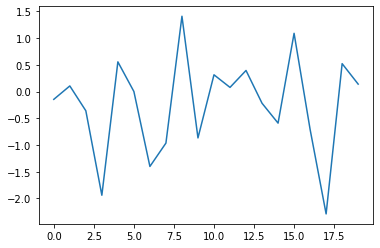

In [25]:
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

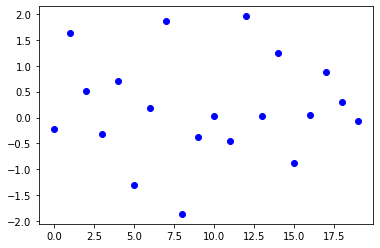

In [26]:
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y, 'bo')
plt.show()

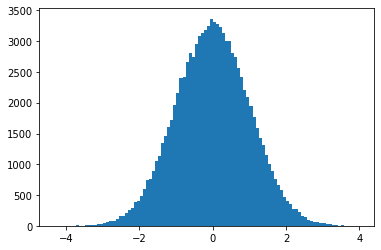

In [28]:
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal, bins=100)
plt.show()

### **2-Lyaer XOR 네트워크의 정보 시각화**

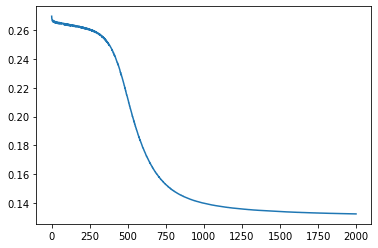

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])